In [1]:
# Import required Libraries
import os,sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')


## Target:Accurately predict insurance costs?
## Columns
### age: age of primary beneficiary
### sex: insurance contractor gender, female, male
### bmi: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height,objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9
### children: Number of children covered by health insurance / Number of dependents
### smoker: Smoking
### region: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.
### charges(Target): Individual medical costs 



In [2]:
os.getcwd()

'C:\\Users\\priya\\Python\\Healthcare Projects_personal\\Insurance Premium Cost'

In [3]:
ins_df=pd.read_csv('insurance.csv')
ins_df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
# check the basic info of data
ins_df.info()
# we have 7 features from whcih 4 are numerical type and 3 are object, so we need to convert those to numerical form

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


# EDA

In [5]:
# check the shape of dataset
ins_df.shape
# we have 1338 rows and 7 features

(1338, 7)

In [6]:
# check for null values 
ins_df.isnull().sum()
# there are no null values

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [7]:
# check for duplicates 
ins_df.duplicated().sum()
# There is only 1 duplicate record but it might not be true as two persons can have these same details

1

In [8]:
# check the duplicate records
ins_df[ins_df['charges']==1639.5631]

,age,sex,bmi,children,smoker,region,charges
195,19,male,30.59,0,no,northwest,1639.5631
581,19,male,30.59,0,no,northwest,1639.5631


In [9]:
ins_df.describe(include='all')

,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338,1338.000000,1338.000000,1338,1338,1338.000000
unique,NaN,2,NaN,NaN,2,4,NaN
top,NaN,male,NaN,NaN,no,southeast,NaN
freq,NaN,676,NaN,NaN,1064,364,NaN
mean,39.207025,NaN,30.663397,1.094918,NaN,NaN,13270.422265
std,14.049960,NaN,6.098187,1.205493,NaN,NaN,12110.011237
min,18.000000,NaN,15.960000,0.000000,NaN,NaN,1121.873900
25%,27.000000,NaN,26.296250,0.000000,NaN,NaN,4740.287150
50%,39.000000,NaN,30.400000,1.000000,NaN,NaN,9382.033000
75%,51.000000,NaN,34.693750,2.000000,NaN,NaN,16639.912515


In [10]:
# by looking at data description we can conclude the below:
# mean and median values for age,bmi and children is same so there is very less chance of outliers.
# there are 4 regions in our datset out of whcih southwest is the top region
# out of 1338 peope 1064 are non smokers. This might be an important variable as inurance premium tend to be more for smokers.


Text(0.5, 1.0, 'Distribution of Charges')

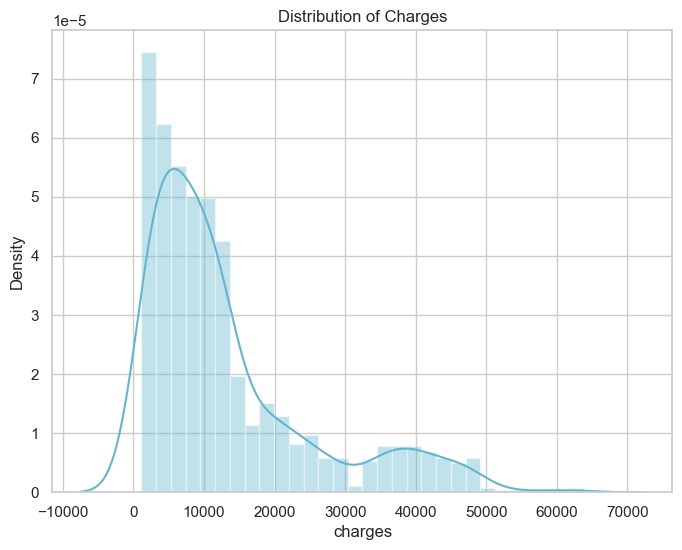

In [11]:
# Plot the distribution of charges
sns.set(style='whitegrid')
f, ax = plt.subplots(1,1, figsize=(8, 6))
ax = sns.distplot(ins_df['charges'], kde = True, color = 'c')
plt.title('Distribution of Charges')
# we can see that the data is right skewed which is practically true as well because some of the people will have very 
# high premium depending on the pre existing conditions.

Text(0.5, 1.0, 'Distribution of Charges')

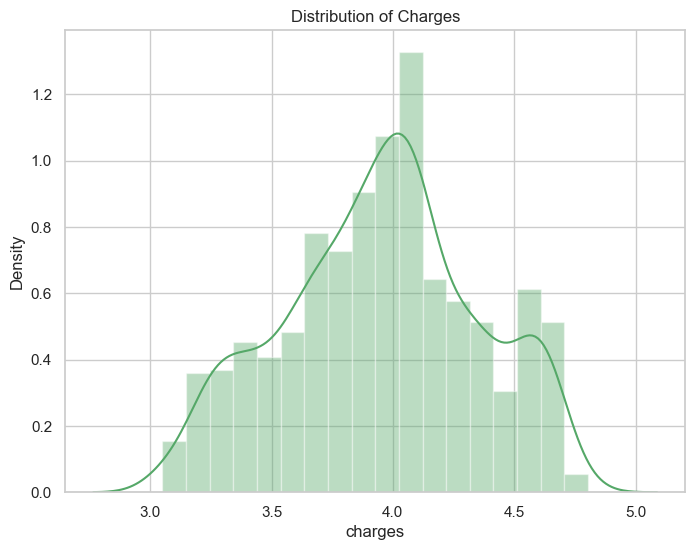

In [12]:
sns.set(style='whitegrid')
f, ax = plt.subplots(1,1, figsize=(8, 6))
ax = sns.distplot(np.log10(ins_df['charges']), kde = True, color = 'g')
plt.title('Distribution of Charges')
# if we take a log the data becaome almost normally distributed

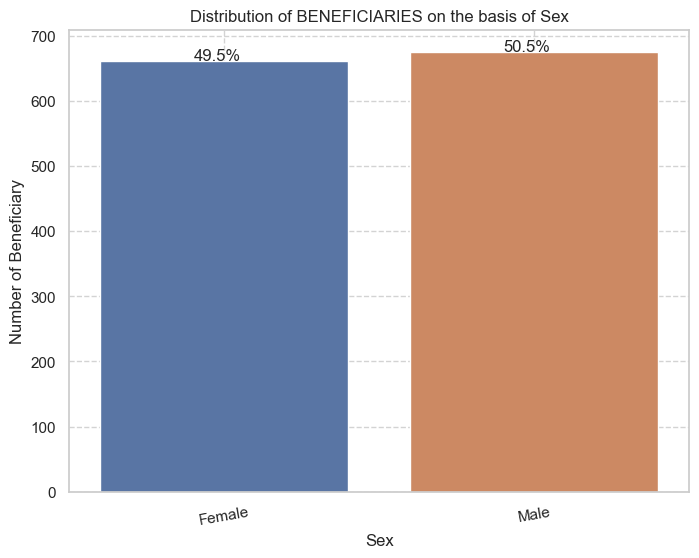

Number of records of each Category is:
male      676
female    662
Name: sex, dtype: int64


In [13]:
# Gender Distribution
plt.figure(figsize=(8,6))
ax=sns.countplot(data=ins_df,x='sex')
for i in ax.patches:
    percentage='{:.1f}%'.format(100*i.get_height()/len(ins_df))
    x=i.get_x()+i.get_width()/2-0.1
    y=i.get_y()+i.get_height()
    ax.annotate(percentage,(x,y),size=12)
plt.xlabel("Sex")
plt.xticks(labels=["Female","Male"], ticks=[0,1], rotation=10)
plt.ylabel("Number of Beneficiary")
plt.grid(which='major', linestyle="--", color='lightgrey')
plt.minorticks_on()
plt.title("Distribution of BENEFICIARIES on the basis of Sex")
plt.show()
print('Number of records of each Category is:')
print(ins_df['sex'].value_counts())


# we can conclude that the cunt of male and female is almost same.

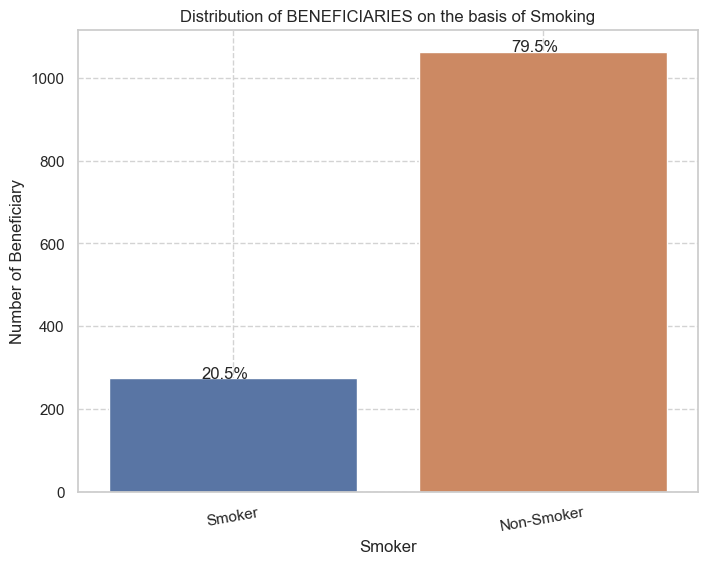

Number of records of each Category is:
no     1064
yes     274
Name: smoker, dtype: int64


In [14]:
# Smoker Distribution
plt.figure(figsize=(8,6))
ax=sns.countplot(data=ins_df,x='smoker')
for i in ax.patches:
    percentage='{:.1f}%'.format(100*i.get_height()/len(ins_df))
    x=i.get_x()+i.get_width()/2-0.1
    y=i.get_y()+i.get_height()
    ax.annotate(percentage,(x,y),size=12)
plt.xlabel("Smoker")
plt.xticks(labels=["Smoker","Non-Smoker"], ticks=[0,1], rotation=10)
plt.ylabel("Number of Beneficiary")
plt.grid(which='major', linestyle="--", color='lightgrey')
plt.minorticks_on()
plt.title("Distribution of BENEFICIARIES on the basis of Smoking")
plt.show()
print('Number of records of each Category is:')
print(ins_df['smoker'].value_counts())


# we can conclude that approx 20% of the pperson are smokers and 80% are non smokers.

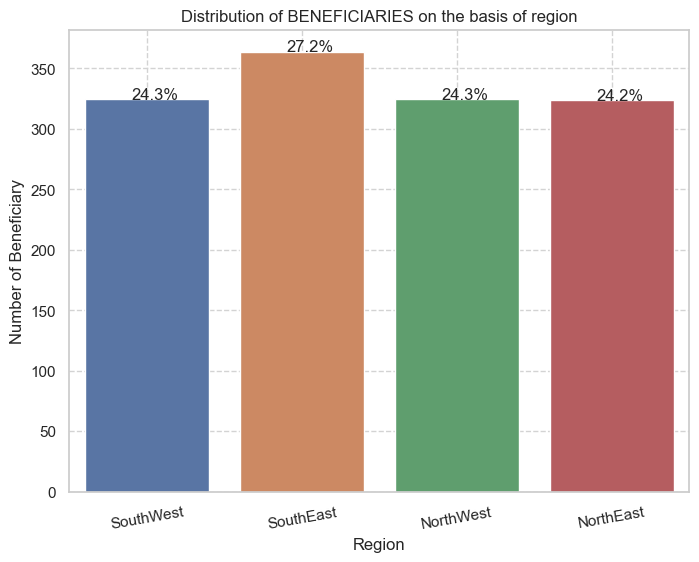

Number of records of each Category is:
southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64


In [15]:
# Region Countplot
plt.figure(figsize=(8,6))
ax=sns.countplot(data=ins_df,x='region')
for i in ax.patches:
    percentage='{:.1f}%'.format(100*i.get_height()/len(ins_df))
    x=i.get_x()+i.get_width()/2-0.1
    y=i.get_y()+i.get_height()
    ax.annotate(percentage,(x,y),size=12)
plt.xlabel("Region")
plt.xticks(labels=["SouthWest","SouthEast","NorthWest","NorthEast"], ticks=[0,1,2,3], rotation=10)
plt.ylabel("Number of Beneficiary")
plt.grid(which='major', linestyle="--", color='lightgrey')
plt.minorticks_on()
plt.title("Distribution of BENEFICIARIES on the basis of region")
plt.show()
print('Number of records of each Category is:')
print(ins_df['region'].value_counts())


# we can conclude that approx 20% of the pperson are smokers and 80% are non smokers.

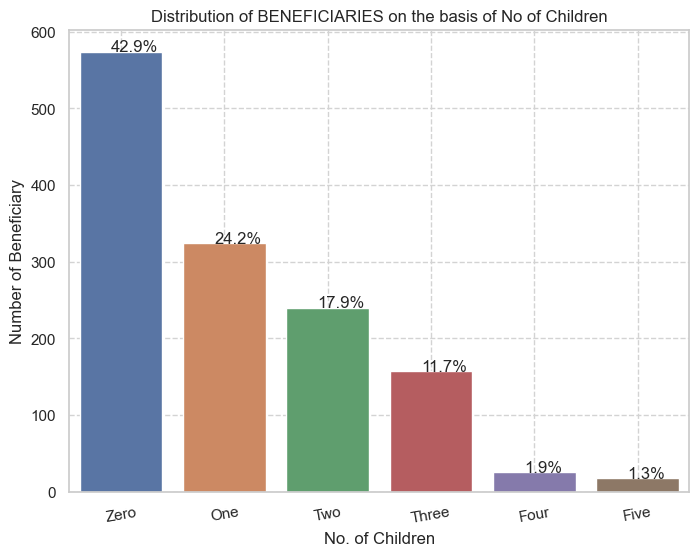

Number of records of each Category is:
0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64


In [16]:
# Region Countplot
plt.figure(figsize=(8,6))
ax=sns.countplot(data=ins_df,x='children')
for i in ax.patches:
    percentage='{:.1f}%'.format(100*i.get_height()/len(ins_df))
    x=i.get_x()+i.get_width()/2-0.1
    y=i.get_y()+i.get_height()
    ax.annotate(percentage,(x,y),size=12)
plt.xlabel("No. of Children")
plt.xticks(labels=["Zero","One","Two","Three","Four","Five"], ticks=[0,1,2,3,4,5], rotation=10)
plt.ylabel("Number of Beneficiary")
plt.grid(which='major', linestyle="--", color='lightgrey')
plt.minorticks_on()
plt.title("Distribution of BENEFICIARIES on the basis of No of Children")
plt.show()
print('Number of records of each Category is:')
print(ins_df['children'].value_counts())


# approx 43% of the enrolled beneficiary does not have any child
# approx 54% have either 1-2-3 childs

In [17]:
ins_df['age'].value_counts()

18    69
19    68
50    29
51    29
47    29
46    29
45    29
20    29
48    29
52    29
22    28
49    28
54    28
53    28
21    28
26    28
24    28
25    28
28    28
27    28
23    28
43    27
29    27
30    27
41    27
42    27
44    27
31    27
40    27
32    26
33    26
56    26
34    26
55    26
57    26
37    25
59    25
58    25
36    25
38    25
35    25
39    25
61    23
60    23
63    23
62    23
64    22
Name: age, dtype: int64

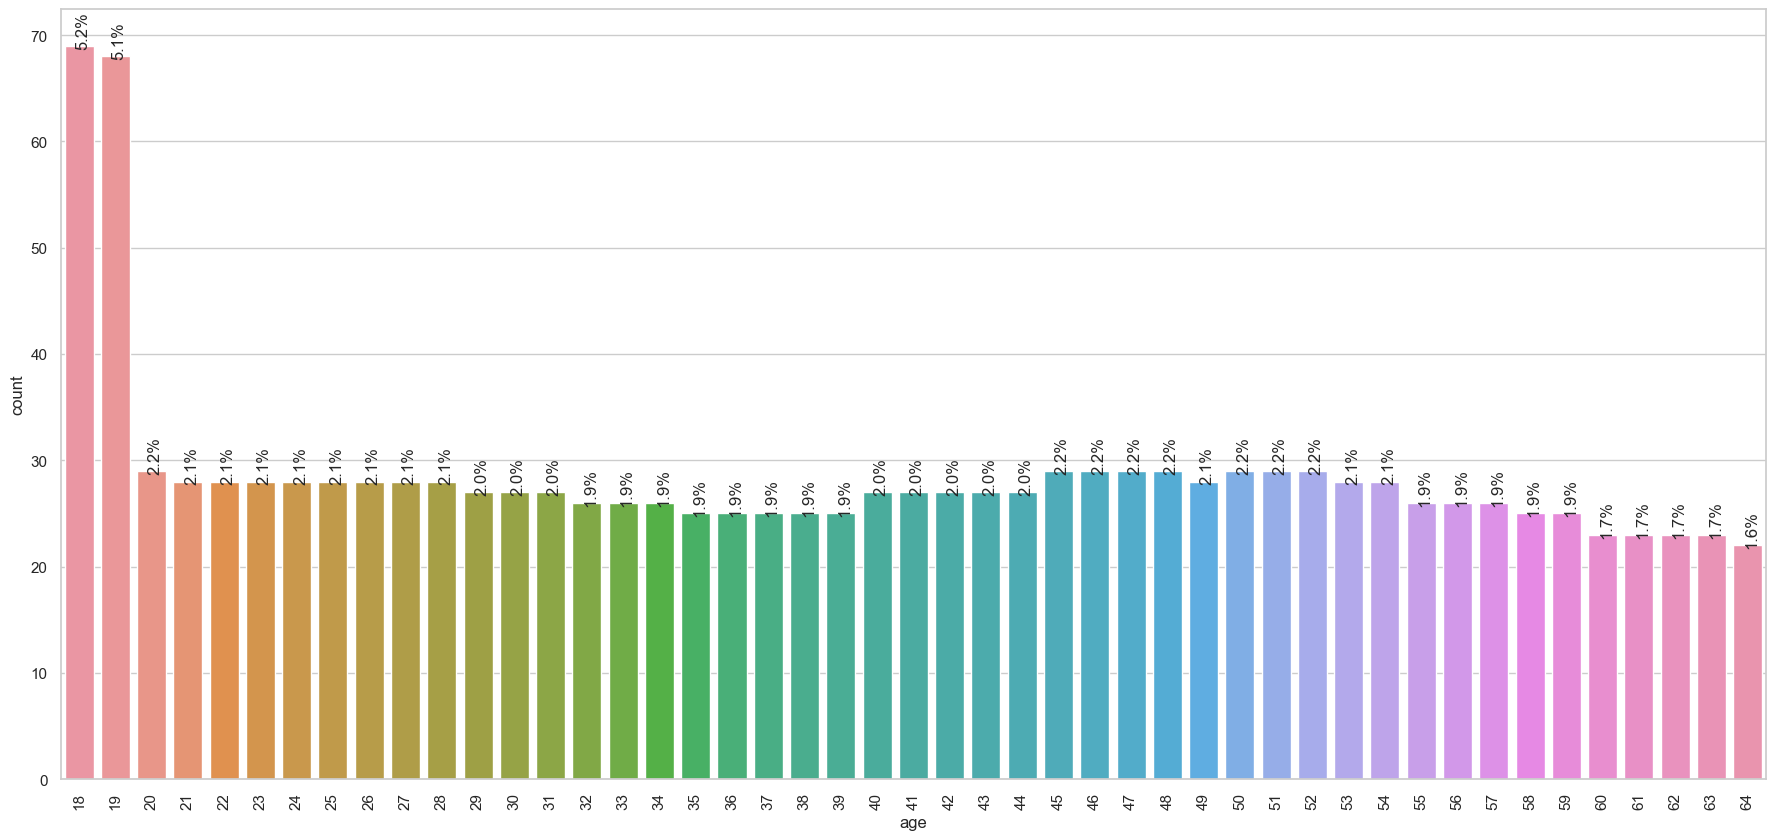

In [18]:
plt.figure(figsize=(22,10))
ax=sns.countplot(data=ins_df,x='age')
for i in ax.patches:
        percentage='{:.1f}%'.format(100*i.get_height()/len(ins_df))
        x=i.get_x()+i.get_width()/2-0.1
        y=i.get_y()+i.get_height()
        ax.annotate(percentage,(x,y),size=12,rotation=90)
plt.xticks(rotation=90)
plt.show()
# for age 18 19 we have appox 5-5 % peoples and rest all age the plot is quite flat

Text(0.5, 1.0, 'Distribution of age')

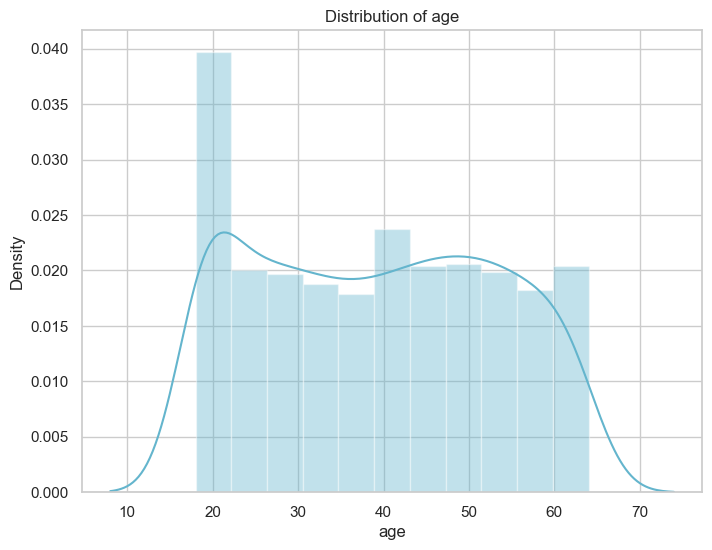

In [19]:
# Plot the distribution of charges
sns.set(style='whitegrid')
f, ax = plt.subplots(1,1, figsize=(8, 6))
ax = sns.distplot(ins_df['age'], kde = True, color = 'c')
plt.title('Distribution of age')

In [20]:
ins_df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

## Lets do some bivariate analysis

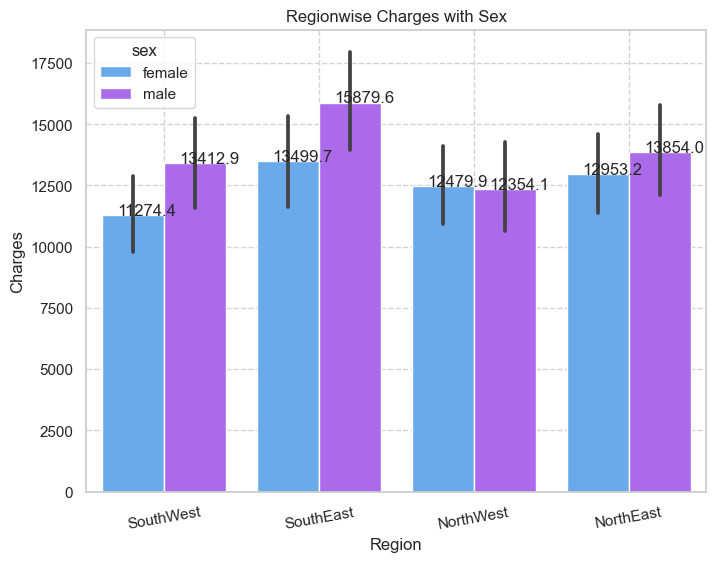

In [21]:
# Region Countplot with sex
plt.figure(figsize=(8,6))
ax=sns.barplot(data=ins_df,x='region',y='charges',hue='sex',palette='cool')

for i in ax.patches:
    percentage='{:.1f}'.format(i.get_height())
    x=i.get_x()+i.get_width()/2-.1
    y=i.get_y()+i.get_height()
    ax.annotate(percentage,(x,y),size=12)
    
plt.xlabel("Region")
plt.xticks(labels=["SouthWest","SouthEast","NorthWest","NorthEast"], ticks=[0,1,2,3], rotation=10)
plt.ylabel("Charges")
plt.grid(which='major', linestyle="--", color='lightgrey')
plt.minorticks_on()
plt.title("Regionwise Charges with Sex")
plt.show()

# we can see males from southeast region are having the highrest costs of about $15879
# female from southwest are having lowest costs i.e about $11274

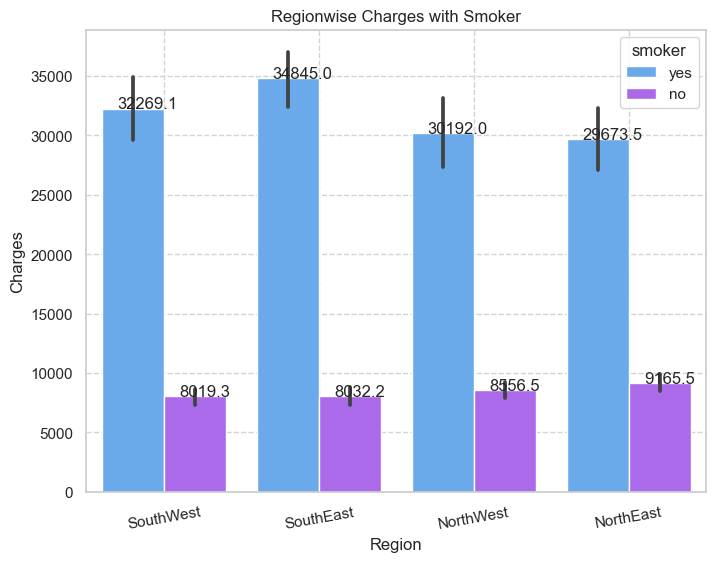

In [22]:
# Region Countplot-- with smoker
plt.figure(figsize=(8,6))
ax=sns.barplot(data=ins_df,x='region',y='charges',hue='smoker',palette='cool')

for i in ax.patches:
    percentage='{:.1f}'.format(i.get_height())
    x=i.get_x()+i.get_width()/2-.1
    y=i.get_y()+i.get_height()
    ax.annotate(percentage,(x,y),size=12)
    
plt.xlabel("Region")
plt.xticks(labels=["SouthWest","SouthEast","NorthWest","NorthEast"], ticks=[0,1,2,3], rotation=10)
plt.ylabel("Charges")
plt.grid(which='major', linestyle="--", color='lightgrey')
plt.minorticks_on()
plt.title("Regionwise Charges with Smoker")
plt.show()

# we can see there is a huge difference between the charges of a smoker and non smokers for all the 4 regions.

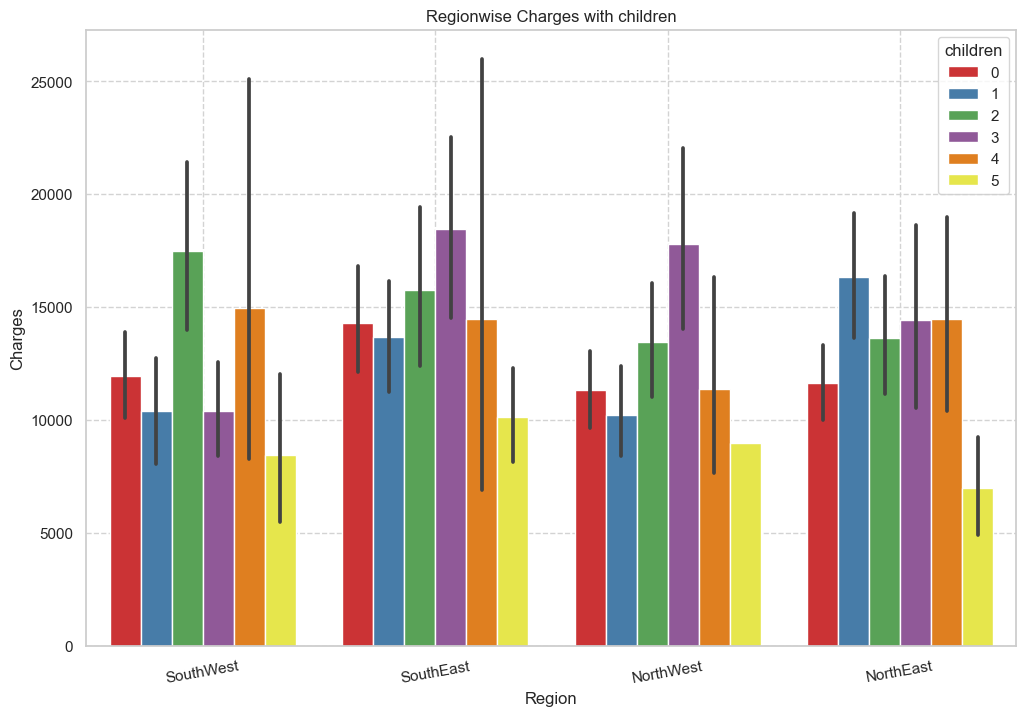

In [23]:
# Region Countplot-- with children
plt.figure(figsize=(12,8))
ax=sns.barplot(data=ins_df,x='region',y='charges',hue='children',palette='Set1')

# for i in ax.patches:
#     percentage='${:.1f}'.format(i.get_height())
#     x=i.get_x()+i.get_width()/2-.1
#     y=i.get_y()+i.get_height()
#     ax.annotate(percentage,(x,y),size=12)
    
plt.xlabel("Region")
plt.xticks(labels=["SouthWest","SouthEast","NorthWest","NorthEast"], ticks=[0,1,2,3], rotation=10)
plt.ylabel("Charges")
plt.grid(which='major', linestyle="--", color='lightgrey')
plt.minorticks_on()
plt.title("Regionwise Charges with children")
plt.show()

# one thing that we can see is for 5 children the amounts are coming to be the minimum which is little weird as 
# increasing the number of dependents should increase the premium as well.

<AxesSubplot: xlabel='bmi', ylabel='charges'>

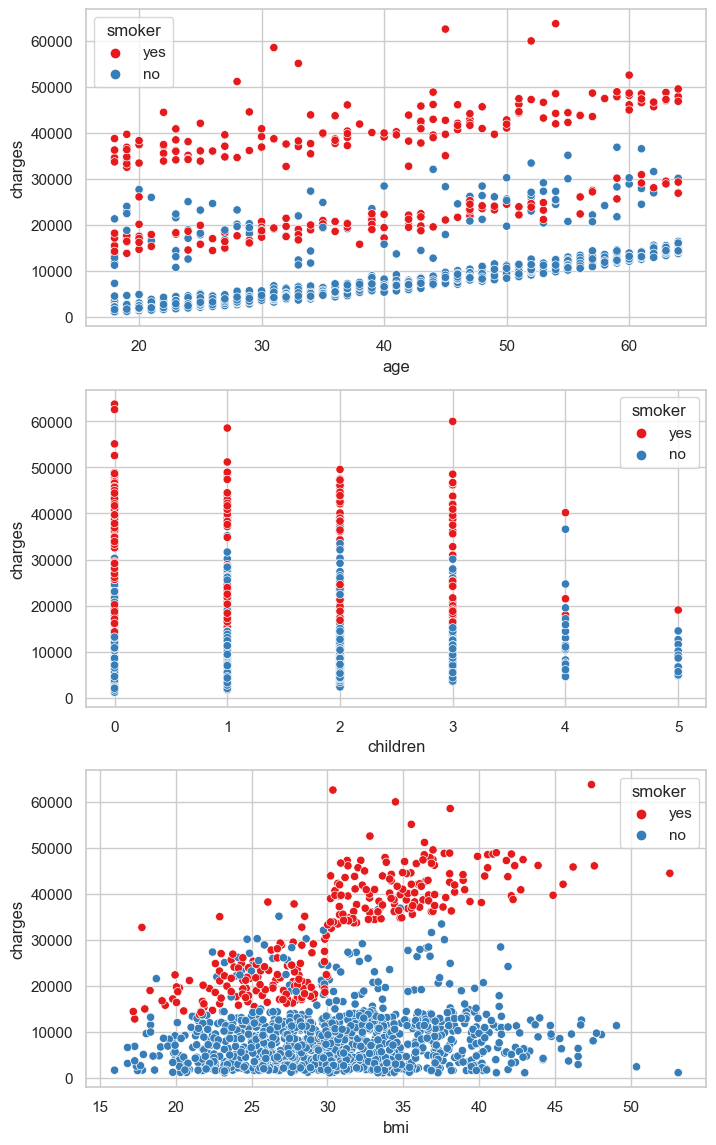

In [24]:
f, ax = plt.subplots(3, 1, figsize=(8, 14))
sns.scatterplot(data=ins_df,x='age',y='charges',hue='smoker',palette='Set1',ax=ax[0])
sns.scatterplot(data=ins_df,x='children',y='charges',hue='smoker',palette='Set1',ax=ax[1])
sns.scatterplot(data=ins_df,x='bmi',y='charges',hue='smoker',palette='Set1',ax=ax[2])

# insights:
# we can clearly see for smkers premiums are very high. We have few point overlapping as well but those might be 
# because of some other factors like bmi etc.

# from the third plot we can see that increase in BMI is not increasing the premiums that much but if you are a smokers 
# then premium increase is much higher.
# one more thing which we can see people with more number of childrens tend to smoke less 

In [25]:
ins_df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [26]:
# calculating a new feild for BMI:
# Turning BMI into Categorical Variables:
# Under Weight: Body Mass Index (BMI)  <18.5
# Normal Weight: Body Mass Index (BMI)  ≥18.5 and Body Mass Index (BMI)  <24.9
# Overweight: Body Mass Index (BMI)  ≥25 and Body Mass Index (BMI)  <29.9
# Obese: Body Mass Index (BMI)  >30
    
def weight_cat(value):
    if value<18.5:
        return 'Under Weight'
    elif 18.5<=value<24.9:
        return 'Normal Weight'
    elif 25<=value<29.9:
        return 'Overweight'
    else:
        return 'Obese'

In [27]:
ins_df['weight_cond']=ins_df['bmi'].apply(weight_cat,args=())
ins_df['weight_cond']

0          Overweight
1               Obese
2               Obese
3       Normal Weight
4          Overweight
            ...      
1333            Obese
1334            Obese
1335            Obese
1336       Overweight
1337       Overweight
Name: weight_cond, Length: 1338, dtype: object

In [28]:
ins_df.head(20)

,age,sex,bmi,children,smoker,region,charges,weight_cond
0,19,female,27.900,0,yes,southwest,16884.92400,Overweight
1,18,male,33.770,1,no,southeast,1725.55230,Obese
2,28,male,33.000,3,no,southeast,4449.46200,Obese
3,33,male,22.705,0,no,northwest,21984.47061,Normal Weight
4,32,male,28.880,0,no,northwest,3866.85520,Overweight
5,31,female,25.740,0,no,southeast,3756.62160,Overweight
6,46,female,33.440,1,no,southeast,8240.58960,Obese
7,37,female,27.740,3,no,northwest,7281.50560,Overweight
8,37,male,29.830,2,no,northeast,6406.41070,Overweight
9,60,female,25.840,0,no,northwest,28923.13692,Overweight


Obese            722
Overweight       374
Normal Weight    222
Under Weight      20
Name: weight_cond, dtype: int64


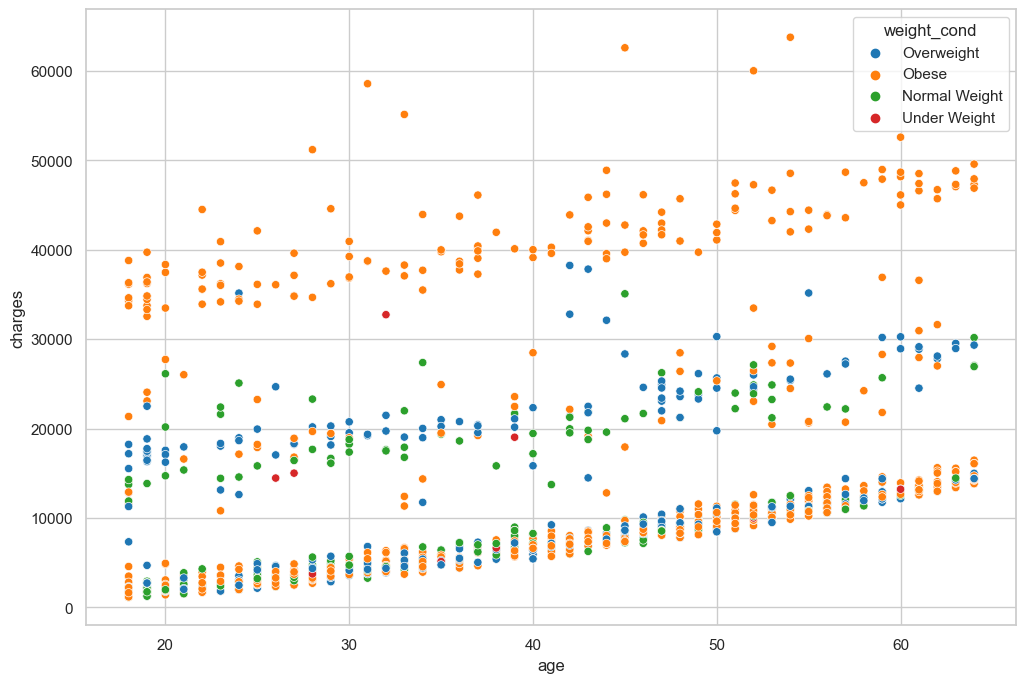

In [29]:
plt.figure(figsize=(12,8))
sns.scatterplot(data=ins_df,x='age',y='charges',hue='weight_cond',palette='tab10')
print(ins_df.weight_cond.value_counts())
# we can see that as the bmi increase premiums are increasing with age.

<AxesSubplot: xlabel='weight_cond', ylabel='charges'>

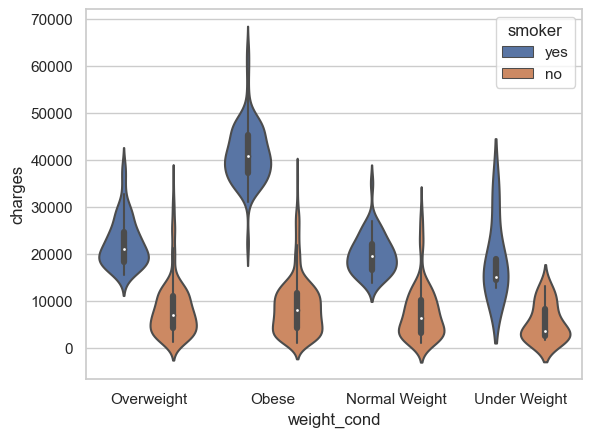

In [30]:
sns.violinplot(x='weight_cond',y='charges',hue='smoker',data=ins_df,paletter='Set1')
# here also we can clearly see premiums are higher for smokers. Also premiumn tend to increase for overweight and obese persons.

In [31]:
ins_df.drop('weight_cond',axis=1,inplace=True)

In [32]:
# Feature Transformation
ins_df=pd.get_dummies(ins_df,columns=['sex','region','smoker'])
ins_df.head()

,age,bmi,children,charges,sex_female,sex_male,region_northeast,region_northwest,region_southeast,region_southwest,smoker_no,smoker_yes
0,19,27.900,0,16884.92400,1,0,0,0,0,1,0,1
1,18,33.770,1,1725.55230,0,1,0,0,1,0,1,0
2,28,33.000,3,4449.46200,0,1,0,0,1,0,1,0
3,33,22.705,0,21984.47061,0,1,0,1,0,0,1,0
4,32,28.880,0,3866.85520,0,1,0,1,0,0,1,0


In [33]:
# dropping the columns to avoid multicolinearity
ins_df.drop(columns=['sex_female','region_northeast','smoker_no'],axis=1,inplace=True)

In [34]:
ins_df.head()

,age,bmi,children,charges,sex_male,region_northwest,region_southeast,region_southwest,smoker_yes
0,19,27.900,0,16884.92400,0,0,0,1,1
1,18,33.770,1,1725.55230,1,0,1,0,0
2,28,33.000,3,4449.46200,1,0,1,0,0
3,33,22.705,0,21984.47061,1,1,0,0,0
4,32,28.880,0,3866.85520,1,1,0,0,0


In [35]:
# moving the target column to last colum
import movecolumn as mc
mc.MoveToLast(ins_df,'charges')
ins_df.head()

,age,bmi,children,sex_male,region_northwest,region_southeast,region_southwest,smoker_yes,charges
0,19,27.900,0,0,0,0,1,1,16884.92400
1,18,33.770,1,1,0,1,0,0,1725.55230
2,28,33.000,3,1,0,1,0,0,4449.46200
3,33,22.705,0,1,1,0,0,0,21984.47061
4,32,28.880,0,1,1,0,0,0,3866.85520


In [36]:
# check for null Values
ins_df.isnull().sum()

age                 0
bmi                 0
children            0
sex_male            0
region_northwest    0
region_southeast    0
region_southwest    0
smoker_yes          0
charges             0
dtype: int64

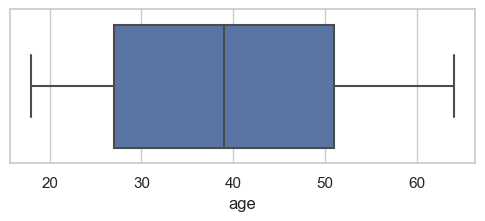

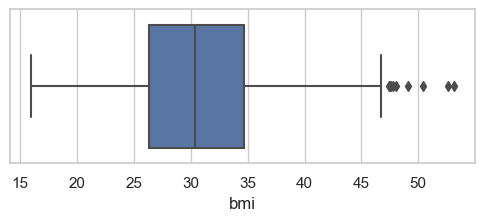

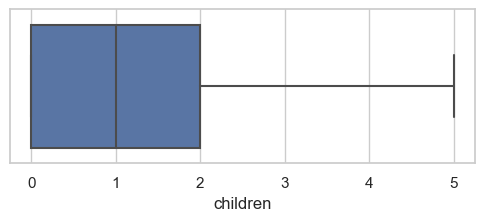

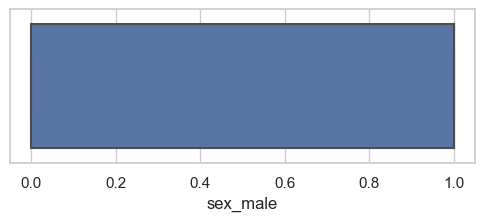

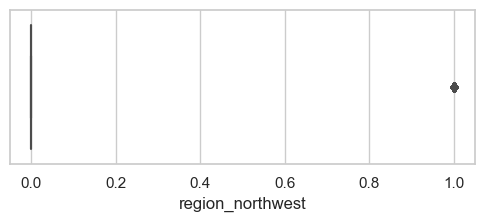

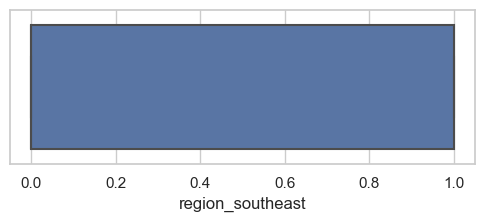

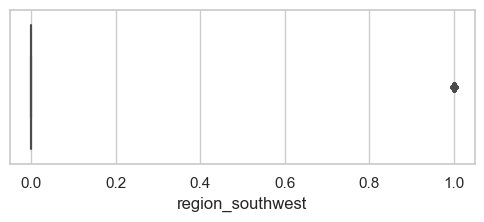

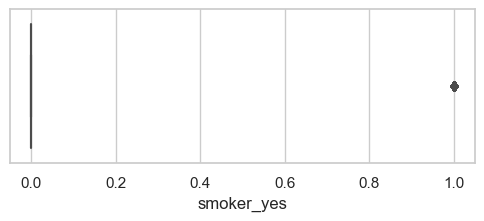

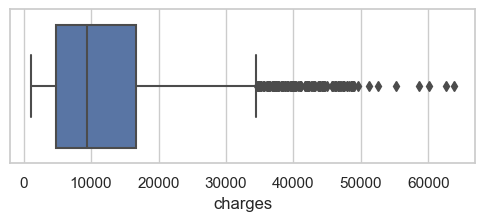

In [37]:
# Check for outliers
for i in ins_df.columns:
    plt.figure(figsize=(6,2))
    sns.boxplot(data=ins_df,x=i)

In [38]:
# we can see that we have few outliers in BMI column and few in charges
# analyse bmi
ins_df['bmi'].describe()
# lookinng at the min and max value we can say that these outliers are true outliers so we should not be changing
#them by imputation. They represent the true variation of the population data.

count    1338.000000
mean       30.663397
std         6.098187
min        15.960000
25%        26.296250
50%        30.400000
75%        34.693750
max        53.130000
Name: bmi, dtype: float64

In [39]:
# analyse charges
ins_df['charges'].describe()
# lookinng at the min and max value we can say that these outliers are true outliers so we should not be changing
#them by imputation. They represent the true variation of the population data. Few members can hnave a very high premiums 
# depending on the preexisitng conditions.

count     1338.000000
mean     13270.422265
std      12110.011237
min       1121.873900
25%       4740.287150
50%       9382.033000
75%      16639.912515
max      63770.428010
Name: charges, dtype: float64

# Correlation matrix

<AxesSubplot: >

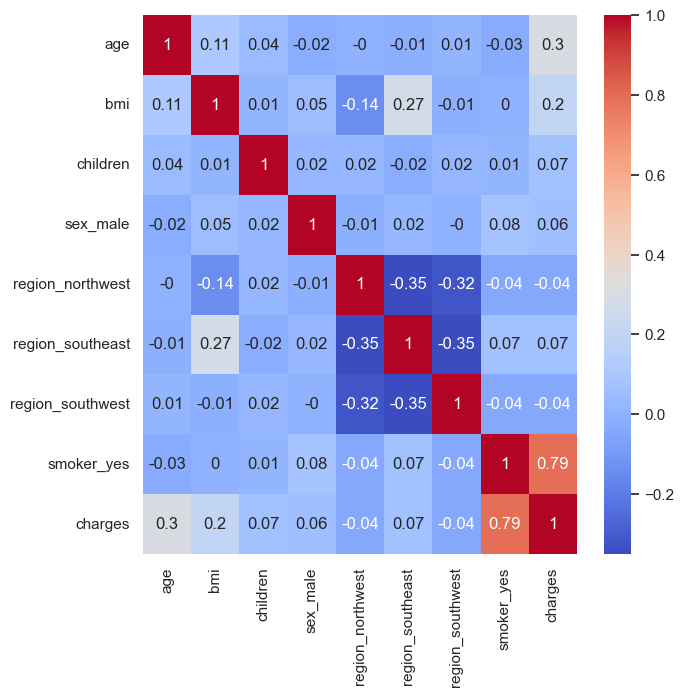

In [40]:
plt.figure(figsize=(7,7))
sns.heatmap(data=ins_df.corr().round(2), annot=True,cmap='coolwarm')
# we can see smoker is highly corelated with the target variable whcih was also reflected wioth the plots that we did as 
# a part of EDA. as it is 79% corelation smoker is a very important variable. Age and bmi also does have a 20-30% corealtion 
# with the tatget charge value.
# none of the features are having a strong corelation among themselves so we are not going to drop any other features.


In [41]:
# splitting the data into depenent and independent variable
X=ins_df.iloc[:,:-1]
Y=ins_df.iloc[:,-1]
X.head()

,age,bmi,children,sex_male,region_northwest,region_southeast,region_southwest,smoker_yes
0,19,27.900,0,0,0,0,1,1
1,18,33.770,1,1,0,1,0,0
2,28,33.000,3,1,0,1,0,0
3,33,22.705,0,1,1,0,0,0
4,32,28.880,0,1,1,0,0,0


In [42]:
Y.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

In [43]:
# We need to do feature scaling as well because regression problems normally works on distance matrix

from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_scaled=sc.fit_transform(X)
x_scaled

array([[-1.43876426, -0.45332   , -0.90861367, ..., -0.61132367,
         1.76548098,  1.97058663],
       [-1.50996545,  0.5096211 , -0.07876719, ...,  1.63579466,
        -0.56641788, -0.5074631 ],
       [-0.79795355,  0.38330685,  1.58092576, ...,  1.63579466,
        -0.56641788, -0.5074631 ],
       ...,
       [-1.50996545,  1.0148781 , -0.90861367, ...,  1.63579466,
        -0.56641788, -0.5074631 ],
       [-1.29636188, -0.79781341, -0.90861367, ..., -0.61132367,
         1.76548098, -0.5074631 ],
       [ 1.55168573, -0.26138796, -0.90861367, ..., -0.61132367,
        -0.56641788,  1.97058663]])

## Check for multicollinearity

In [44]:
# we will use VIF(variance inflation factor to determine multicollinearity. If VIF is less then 5 that mmeans variables
# are not having multicollinearity among them.
from statsmodels.stats.outliers_influence import variance_inflation_factor
variable = x_scaled
vif = pd.DataFrame()
vif['Variance Inflation Factor'] = [variance_inflation_factor(variable, i) 
                                    for i in range(variable.shape[1])]
vif['Features'] = X.columns
vif
# we can see that all values are less than 5 there is no issue of multicollinearity.

,Variance Inflation Factor,Features
0,1.016822,age
1,1.106630,bmi
2,1.004011,children
3,1.008900,sex_male
4,1.518823,region_northwest
5,1.652230,region_southeast
6,1.529411,region_southwest
7,1.012074,smoker_yes


### Splitting the data into train and test

In [45]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_scaled,Y,test_size=0.2,random_state=101)

In [46]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((1070, 8), (268, 8), (1070,), (268,))

## Model Building

In [47]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error,mean_absolute_percentage_error


### Model-1 Linear Regression

In [48]:
from sklearn.linear_model import LinearRegression
linear_model=LinearRegression()
linear_model.fit(x_train,y_train)

LinearRegression()

In [49]:
y_pred_linear_train=linear_model.predict(x_train)
y_pred_linear_test=linear_model.predict(x_test)

print('Training Accuracy is:',r2_score(y_train,y_pred_linear_train))
print('Test Accuracy is:',r2_score(y_test,y_pred_linear_test))


Training Accuracy is: 0.7475616773985516
Test Accuracy is: 0.760837110132396


In [50]:
# Check the coefficients and intercepts
print('Linear Model Coefficient is:',linear_model.coef_)
print('Linear Model Intercept is:',linear_model.intercept_)
coef = pd.DataFrame(linear_model.coef_, X.columns, columns = ['Coefficients'])
coef
# we can see that the coeff of sex_male and region_northwest is very very less so it will not affect out target variable
#prediction much. So we will drop it 

Linear Model Coefficient is: [3434.02383586 2224.7086833   497.68370253   54.36894674   43.24036305
 -406.69701745 -379.30772543 9546.15141776]
Linear Model Intercept is: 13225.261448232584


,Coefficients
age,3434.023836
bmi,2224.708683
children,497.683703
sex_male,54.368947
region_northwest,43.240363
region_southeast,-406.697017
region_southwest,-379.307725
smoker_yes,9546.151418


In [51]:

print('MSE', mean_squared_error(y_test, y_pred_linear_test))
print("##################"*5)
print('RMSE', np.sqrt(mean_squared_error(y_test, y_pred_linear_test)))
print("##################"*5)
print('MAE', mean_absolute_error(y_test, y_pred_linear_test))
print("##################"*5)
print('MAPE', mean_absolute_percentage_error(y_test, y_pred_linear_test))
# we are getting a MAE of about 4800

MSE 33748393.37059589
##########################################################################################
RMSE 5809.336741022669
##########################################################################################
MAE 4036.8740283584357
##########################################################################################
MAPE 0.45320663327674626


In [52]:
import statsmodels.api as sm
x_endog=sm.add_constant(x_train)
res=sm.OLS(y_train,x_endog)
res.fit().summary()
# from this we can see that the p-va;ue for x4 and x5 is much more then 0.05 so these variables are not significant 
# we will drop these variables.

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                charges   R-squared:                       0.748
Model:                            OLS   Adj. R-squared:                  0.746
Method:                 Least Squares   F-statistic:                     392.8
Date:                Wed, 26 Apr 2023   Prob (F-statistic):          7.34e-311
Time:                        10:28:29   Log-Likelihood:                -10846.
No. Observations:                1070   AIC:                         2.171e+04
Df Residuals:                    1061   BIC:                         2.175e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.323e+04    187.628     70.487      0.000    1.29e+04    1.36e+04
x1          3434.0238    190.384     18.037      0.000    3060.452    3807.596
x2          2224.7087    196.811     11.304      0.000    1838.526    2610.891
x3           497.6837    188.457      2.641      0.008     127.894     867.474
x4            54.3689    188.726      0.288      0.773    -315.949     424.687
x5            43.2404    231.431      0.187      0.852    -410.873     497.354
x6          -406.6970    242.110     -1.680      0.093    -881.766      68.372
x7          -379.3077    232.234     -1.633      0.103    -834.998      76.383
x8          9546.1514    186.577     51.165      0.000    9180.050    9912.252
==============================================================================
Omnibus:                      244.125   Durbin-Watson:                   1.987
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              568.643
Skew:                           1.232   Prob(JB):                    3.32e-124
Kurtosis:                       5.585   Cond. No.                         2.21
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [53]:
X1=X.copy()

In [54]:
X1.head()

,age,bmi,children,sex_male,region_northwest,region_southeast,region_southwest,smoker_yes
0,19,27.900,0,0,0,0,1,1
1,18,33.770,1,1,0,1,0,0
2,28,33.000,3,1,0,1,0,0
3,33,22.705,0,1,1,0,0,0
4,32,28.880,0,1,1,0,0,0


In [55]:
X1.drop(columns=['sex_male','region_northwest'],axis=1,inplace=True)

In [56]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_scaled1=sc.fit_transform(X1)
x_scaled1

array([[-1.43876426, -0.45332   , -0.90861367, -0.61132367,  1.76548098,
         1.97058663],
       [-1.50996545,  0.5096211 , -0.07876719,  1.63579466, -0.56641788,
        -0.5074631 ],
       [-0.79795355,  0.38330685,  1.58092576,  1.63579466, -0.56641788,
        -0.5074631 ],
       ...,
       [-1.50996545,  1.0148781 , -0.90861367,  1.63579466, -0.56641788,
        -0.5074631 ],
       [-1.29636188, -0.79781341, -0.90861367, -0.61132367,  1.76548098,
        -0.5074631 ],
       [ 1.55168573, -0.26138796, -0.90861367, -0.61132367, -0.56641788,
         1.97058663]])

In [57]:
# we will use VIF(variance inflation factor to determine multicollinearity. If VIF is less then 5 that mmeans variables
# are not having multicollinearity among them.
from statsmodels.stats.outliers_influence import variance_inflation_factor
variable = x_scaled1
vif = pd.DataFrame()
vif['Variance Inflation Factor'] = [variance_inflation_factor(variable, i) 
                                    for i in range(variable.shape[1])]
vif['Features'] = X1.columns
vif
# we can see that all values are less than 5 there is no issue of multicollinearity.

,Variance Inflation Factor,Features
0,1.016174,age
1,1.104196,bmi
2,1.002831,children
3,1.244250,region_southeast
4,1.147367,region_southwest
5,1.005747,smoker_yes


In [58]:
from sklearn.model_selection import train_test_split
x_train1,x_test1,y_train1,y_test1=train_test_split(x_scaled1,Y,test_size=0.2,random_state=101)

In [59]:
x_train1.shape,x_test1.shape,y_train1.shape,y_test1.shape

((1070, 6), (268, 6), (1070,), (268,))

In [60]:
linear_model1=LinearRegression()
linear_model1.fit(x_train1,y_train1)

LinearRegression()

In [61]:
y_pred_linear_train1=linear_model1.predict(x_train1)
y_pred_linear_test1=linear_model1.predict(x_test1)

print('Training Accuracy is:',r2_score(y_train1,y_pred_linear_train1))
print('Test Accuracy is:',r2_score(y_test1,y_pred_linear_test1))
# after dropping also not much impact on accuracy

Training Accuracy is: 0.7475329063385007
Test Accuracy is: 0.7616617184502601


In [62]:
# Check the coefficients and intercepts
print('Linear Model Coefficient is:',linear_model1.coef_)
print('Linear Model Intercept is:',linear_model1.intercept_)
coef1 = pd.DataFrame(linear_model1.coef_, X1.columns, columns = ['Coefficients'])
coef1
# we can see that the coeff of sex_male and region_northwest is very very less so it will not affect out target variable
#prediction much. So we will drop it 

Linear Model Coefficient is: [3431.83195096 2227.32987135  500.69542874 -429.3368534  -399.81995362
 9549.93641494]
Linear Model Intercept is: 13224.992069329215


,Coefficients
age,3431.831951
bmi,2227.329871
children,500.695429
region_southeast,-429.336853
region_southwest,-399.819954
smoker_yes,9549.936415


In [63]:
import statsmodels.api as sm
x_endog1=sm.add_constant(x_train1)
res=sm.OLS(y_train1,x_endog1)
res.fit().summary()
# from this we can see that the p-va;ue for x4 and x5 is much more then 0.05 so these variables are not significant 
# we will drop these variables.

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                charges   R-squared:                       0.748
Model:                            OLS   Adj. R-squared:                  0.746
Method:                 Least Squares   F-statistic:                     524.6
Date:                Wed, 26 Apr 2023   Prob (F-statistic):          1.49e-313
Time:                        10:28:34   Log-Likelihood:                -10846.
No. Observations:                1070   AIC:                         2.171e+04
Df Residuals:                    1063   BIC:                         2.174e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.322e+04    187.449     70.553      0.000    1.29e+04    1.36e+04
x1          3431.8320    190.107     18.052      0.000    3058.805    3804.859
x2          2227.3299    196.487     11.336      0.000    1841.783    2612.877
x3           500.6954    188.088      2.662      0.008     131.629     869.761
x4          -429.3369    208.870     -2.056      0.040    -839.181     -19.493
x5          -399.8200    200.072     -1.998      0.046    -792.400      -7.240
x6          9549.9364    185.701     51.426      0.000    9185.554    9914.319
==============================================================================
Omnibus:                      244.378   Durbin-Watson:                   1.987
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              569.878
Skew:                           1.233   Prob(JB):                    1.79e-124
Kurtosis:                       5.589   Cond. No.                         1.61
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [64]:
# we are not getting a good accuracy. So we will try other models.

### Model-2 Regularization Models- Ridge, Lasso, Elasticnet

In [65]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet

In [66]:
ridge_reg = Ridge(alpha=.5)
ridge_reg.fit(x_train, y_train)
y_pred_ridge = ridge_reg.predict(x_test)
print ("Ridge model:", (ridge_reg.coef_))
print("Ridge model Accuracy:",r2_score(y_test, y_pred_ridge))

print('*******************************************************************')

lasso_reg = Lasso(alpha=0.5)
lasso_reg.fit(x_train, y_train)
y_pred_lasso = lasso_reg.predict(x_test)
print ("Lasso model:", (lasso_reg.coef_))
print("Lasso model Accuracy:",r2_score(y_test, y_pred_lasso))

print('*******************************************************************')

elastic_reg = ElasticNet(alpha=0.5,l1_ratio=0.5)
elastic_reg.fit(x_train, y_train)
y_pred_elastic = elastic_reg.predict(x_test)
print ("elastic-net model:", (elastic_reg.coef_))
print("elastic-net model accuracy:",r2_score(y_test, y_pred_elastic))

# from all three models we are getting approc 75% accuracy only

Ridge model: [3432.44483201 2223.59859477  497.66294776   54.70757037   43.37295533
 -405.80242443 -378.92539978 9541.70683984]
Ridge model Accuracy: 0.760803642877803
*******************************************************************
Lasso model: [3433.58644052 2224.00836893  497.26338338   53.91166515   43.32019924
 -405.64933365 -378.42649371 9545.68039939]
Lasso model Accuracy: 0.7608390558397927
*******************************************************************
elastic-net model: [2753.18823767 1771.33773292  470.98445215  169.63838948   48.65669879
 -118.64058988 -271.88536917 7645.45816818]
elastic-net model accuracy: 0.7197401220325861


In [67]:
alphas = [0.000001, 0.00001, 0.0001, 0.001, 0.01, 0.1,0.5, 1,10]
for a in alphas:
    model = Ridge(alpha=a).fit(x_train,y_train) 
    score = model.score(x_train,y_train)
    pred_y = model.predict(x_train)
    mse = mean_squared_error(y_train, pred_y) 
    print("Alpha:{0:.6f}, R2:{1:.3f}, MSE:{2:.2f}, RMSE:{3:.2f}"
    .format(a, score, mse, np.sqrt(mse)))
# not much variation in accuracy

Alpha:0.000001, R2:0.748, MSE:37320794.00, RMSE:6109.07
Alpha:0.000010, R2:0.748, MSE:37320794.00, RMSE:6109.07
Alpha:0.000100, R2:0.748, MSE:37320794.00, RMSE:6109.07
Alpha:0.001000, R2:0.748, MSE:37320794.00, RMSE:6109.07
Alpha:0.010000, R2:0.748, MSE:37320794.01, RMSE:6109.07
Alpha:0.100000, R2:0.748, MSE:37320794.95, RMSE:6109.07
Alpha:0.500000, R2:0.748, MSE:37320817.73, RMSE:6109.08
Alpha:1.000000, R2:0.748, MSE:37320888.84, RMSE:6109.08
Alpha:10.000000, R2:0.747, MSE:37330115.81, RMSE:6109.84


In [68]:
alphas = [0.000001, 0.00001, 0.0001, 0.001, 0.01, 0.1,0.5, 1,10]
for a in alphas:
    model = Lasso(alpha=a).fit(x_train,y_train) 
    score = model.score(x_train,y_train)
    pred_y = model.predict(x_train)
    pred_y_test = model.predict(x_test)
    mse = mean_squared_error(y_test, pred_y_test) 
    print("Alpha:{0:.6f}, R2:{1:.3f}, MSE:{2:.2f}, RMSE:{3:.2f}"
    .format(a, score, mse, np.sqrt(mse)))
# no impact almost same accuracy we are geting

Alpha:0.000001, R2:0.748, MSE:33748393.37, RMSE:5809.34
Alpha:0.000010, R2:0.748, MSE:33748393.36, RMSE:5809.34
Alpha:0.000100, R2:0.748, MSE:33748393.32, RMSE:5809.34
Alpha:0.001000, R2:0.748, MSE:33748392.85, RMSE:5809.34
Alpha:0.010000, R2:0.748, MSE:33748388.04, RMSE:5809.34
Alpha:0.100000, R2:0.748, MSE:33748339.19, RMSE:5809.33
Alpha:0.500000, R2:0.748, MSE:33748118.81, RMSE:5809.31
Alpha:1.000000, R2:0.748, MSE:33747850.28, RMSE:5809.29
Alpha:10.000000, R2:0.748, MSE:33743570.94, RMSE:5808.92


### Model-3 Polynomial Regression


In [69]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree=2)
x_poly_train = poly_reg.fit_transform(x_train)
pol_reg = LinearRegression()
pol_reg.fit(x_poly_train, y_train)
y_pred_poly=pol_reg.predict(poly_reg.fit_transform(x_test))

In [70]:
y_pred_poly_train=pol_reg.predict(poly_reg.fit_transform(x_train))
y_pred_poly_test=pol_reg.predict(poly_reg.fit_transform(x_test))

print('Training Accuracy is:',r2_score(y_train,y_pred_poly_train))
print('Test Accuracy is:',r2_score(y_test,y_pred_poly_test))
# Accuracy is improve little bit: we are gettign approx 84% accuracy

Training Accuracy is: 0.8466906627445909
Test Accuracy is: 0.8452963261382319


In [71]:

print('MSE', mean_squared_error(y_test, y_pred_poly_test))
print("##################"*5)
print('RMSE', np.sqrt(mean_squared_error(y_test, y_pred_poly_test)))
print("##################"*5)
print('MAE', mean_absolute_error(y_test, y_pred_poly_test))
print("##################"*5)
print('MAPE', mean_absolute_percentage_error(y_test, y_pred_poly_test))
# we are getting a MAE of about 2821 which is very good.


MSE 21830311.735460166
##########################################################################################
RMSE 4672.291914623932
##########################################################################################
MAE 2821.2585016044777
##########################################################################################
MAPE 0.3366875616296057


### Model-4 XGBoost Regressor

In [72]:
from xgboost import XGBRegressor
model_xgb=XGBRegressor(random_state=101)

In [73]:
model_xgb.fit(x_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=101, ...)

In [74]:

y_pred_xgb_test=model_xgb.predict(x_test)
print('Test Accuracy is:',r2_score(y_test,y_pred_xgb_test))
# Accuracy is 82%.

Test Accuracy is: 0.8167649151309143


In [75]:

print('MSE', mean_squared_error(y_test, y_pred_poly_test))
print("##################"*5)
print('RMSE', np.sqrt(mean_squared_error(y_test, y_pred_poly_test)))
print("##################"*5)
print('MAE', mean_absolute_error(y_test, y_pred_poly_test))
print("##################"*5)
print('MAPE', mean_absolute_percentage_error(y_test, y_pred_poly_test))
# we are getting a MAE of about 2821 which is very good.


MSE 21830311.735460166
##########################################################################################
RMSE 4672.291914623932
##########################################################################################
MAE 2821.2585016044777
##########################################################################################
MAPE 0.3366875616296057


In [76]:
### Model-5 RandomForest Regressor
from sklearn.ensemble import RandomForestRegressor
import time
from sklearn.model_selection import GridSearchCV

In [77]:
rf=RandomForestRegressor(random_state=101)
rf.fit(x_train,y_train)

RandomForestRegressor(random_state=101)

In [78]:
y_pred_rf_train=rf.predict(x_train)
y_pred_rf_test=rf.predict(x_test)

print('Training Accuracy is:',r2_score(y_train,y_pred_rf_train))
print('Test Accuracy is:',r2_score(y_test,y_pred_rf_test))

# we are getting a problem of overfitting

Training Accuracy is: 0.9766677178648978
Test Accuracy is: 0.8432301167823171


In [79]:

print('MSE', mean_squared_error(y_test, y_pred_rf_test))
print("##################"*5)
print('RMSE', np.sqrt(mean_squared_error(y_test, y_pred_rf_test)))
print("##################"*5)
print('MAE', mean_absolute_error(y_test, y_pred_rf_test))
print("##################"*5)
print('MAPE', mean_absolute_percentage_error(y_test, y_pred_rf_test))
# we are getting a MAE of about 4800

MSE 22121875.556954477
##########################################################################################
RMSE 4703.38979428183
##########################################################################################
MAE 2670.6311169488754
##########################################################################################
MAPE 0.3310069659121589


In [80]:
## Define Grid 
start = time.time()
grid = { 
    'n_estimators': [100,500,1000],
    'max_features': ['sqrt','log2','None'],
    'max_depth' : [3,4,5,6]
}
CV_rfr = GridSearchCV(estimator=RandomForestRegressor(), param_grid=grid, cv= 10) ## Grid Search function
CV_rfr.fit(x_train, y_train)
end = time.time()
print('Time taken in grid search: {0: .2f}'.format(end - start))
print('Best Parameters using grid search: \n', CV_rfr.best_params_)

Time taken in grid search:  222.65
Best Parameters using grid search: 
 {'max_depth': 6, 'max_features': 'log2', 'n_estimators': 500}


In [81]:
print('Best Parameters using grid search: \n', CV_rfr.best_params_)

Best Parameters using grid search: 
 {'max_depth': 6, 'max_features': 'log2', 'n_estimators': 500}


In [86]:
rf1 = RandomForestRegressor(n_estimators = 500, max_features = 'log2', max_depth = 6)
rf1.fit(x_train, y_train)


RandomForestRegressor(max_depth=6, max_features='log2', n_estimators=500)

In [87]:
y_pred_rf1_train=rf1.predict(x_train)
y_pred_rf1_test=rf1.predict(x_test)

print('Training Accuracy is:',r2_score(y_train,y_pred_rf1_train))
print('Test Accuracy is:',r2_score(y_test,y_pred_rf1_test))
# we are getting a good accuracy of 85%

Training Accuracy is: 0.8881232258231275
Test Accuracy is: 0.8505134586264305


In [88]:

print('MSE', mean_squared_error(y_test, y_pred_rf1_test))
print("##################"*5)
print('RMSE', np.sqrt(mean_squared_error(y_test, y_pred_rf1_test)))
print("##################"*5)
print('MAE', mean_absolute_error(y_test, y_pred_rf1_test))
print("##################"*5)
print('MAPE', mean_absolute_percentage_error(y_test, y_pred_rf1_test))
# we are getting a MAE of about 2886 which is pretty good.

MSE 21094119.596388303
##########################################################################################
RMSE 4592.833504100525
##########################################################################################
MAE 2913.1707042214357
##########################################################################################
MAPE 0.45355666720065907


In [85]:
predicted_comp_df=pd.DataFrame({'Actual':y_test,'Predicted':y_pred_rf1_test})
predicted_comp_df

,Actual,Predicted
44,6079.67150,7942.149014
134,2457.21115,4450.533508
980,25517.11363,11420.924304
618,34439.85590,34772.822774
1238,6985.50695,7595.479092
...,...,...
648,1712.22700,4139.791553
1023,1711.02680,5131.900056
28,2775.19215,5827.731415
798,11848.14100,12198.299058


In [89]:
# we can say that polynomial regression and random forest regressor are best model with an test accuracy of about 85%.
# also we are getting the mean absolute error of approx 2800. SO we can say ti smodel is a good model. 
# we can present this to client to take further steps.